In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

## クラスタリング

- データセットを「クラスタ」と呼ばれるグループに分割するタスク
- 目的は、同じクラスタ内のデータが類似していて、異なるクラスタのデータは異なるようにデータを分割すること

### k-meansクラスタリング

- データのある領域を代表するようなクラスタ重心を見つけようとする
- 2つのステップを繰り返す
    - 個々のデータポイントを最寄りのクラスタ重心に割り当てる
    - 個々のクラスタ重心をその点に割り当てられたデータポイントの平均に設定する

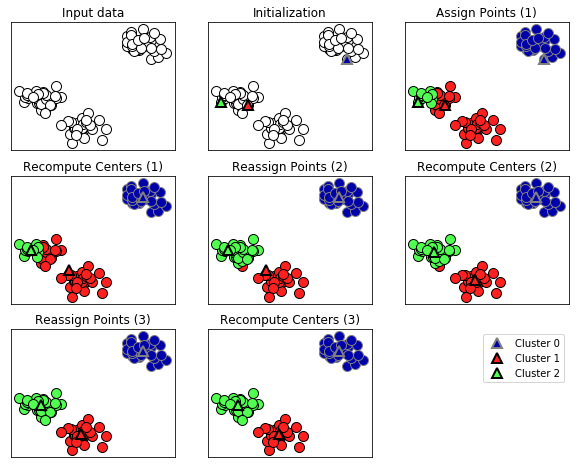

In [3]:
mglearn.plots.plot_kmeans_algorithm()

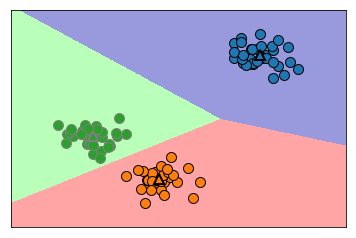

In [5]:
mglearn.plots.plot_kmeans_boundaries()

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#合成2次元データを作る
X, y = make_blobs(random_state=1)

# クラスタリングモデルを作る
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


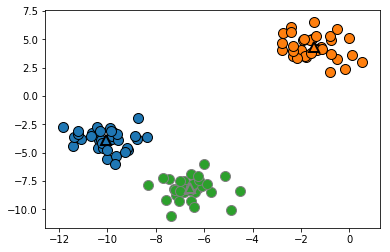

In [11]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

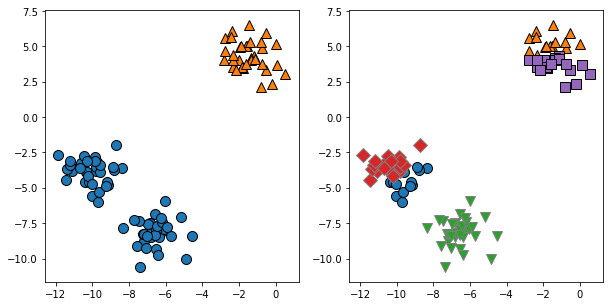

In [12]:
#クラスタセンタの数を減らす
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# クラスタセンタを2つに指定
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

#クラスタセンタを5つに指定
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

### k-meansがうまく行かない場合

- あるデータセットに対して、「正しい」クラスタの数がわかっていたとしても、k-meansがうまくそれを見つけられるとは限らない
- k-meansでは、境界線をクラスタセンタのちょうど中間に引く
- k-meansは全ての方向が同じように重要であることを仮定する
- 人間の目には明らかに3つに分離できるデータポイントをもつデータセットにもうまく行かないことがある
- k-meansは複雑なデータセットにもうまく行かないことがある

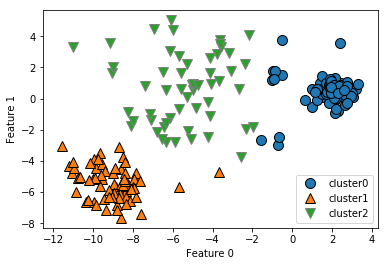

In [15]:
X_varied, y_varied = make_blobs(n_samples=200,
                                                           cluster_std=[1.0, 2.5, 0.5],
                                                           random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster0", "cluster1", "cluster2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- クラスタ0とクラスタ1に、真ん中の方向に他のデータポイントとかけ離れた位置にあるデータポイントも含まれてしまっている

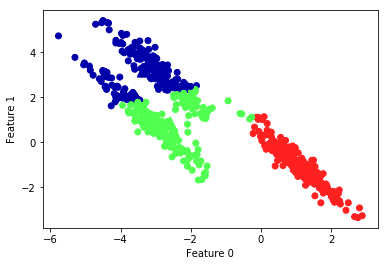

In [17]:
# ランダムにクラスタデータを作成
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 対角線方向に引き延ばす
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

#  データポイントを3つにクラスタリング
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='^', c=[0,1,2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- k-meansは丸くないクラスタを認識できない

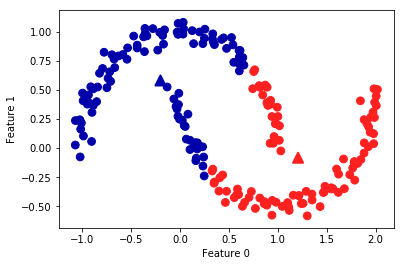

In [19]:
#合成データセットtwo_moonsデータ作成
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

#2つのクラスタにクラスタ分類
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 凝集型クラスタリング

- 個々のデータポイントをそれぞれ個別のクラスタとして開始し、最も類似した2つのクラスタを併合していく
- これを何らかの終了条件が満たされるまで続けていく
- scikit-learnでは、終了条件はクラスターの数
- つまり、指定した数のクラスタだけが残るまで併合を続ける
- 「最も類似したクラスタ」を決定する連結度にはさまざまものがある。sklearnには3つ。
    - ward
        デフォルト。併合した際に、クラスタ内の分散の増分が最小になるように２クラスタを選択する
    - average
        average連結度を用いると、クラスタ間の全てのポイント間の距離の平均値が最小の２クラスタを併合する
    - complete
        complete連結度は、2つのクラスタ点間の距離の最大値が最小になるように２クラスタを併合する

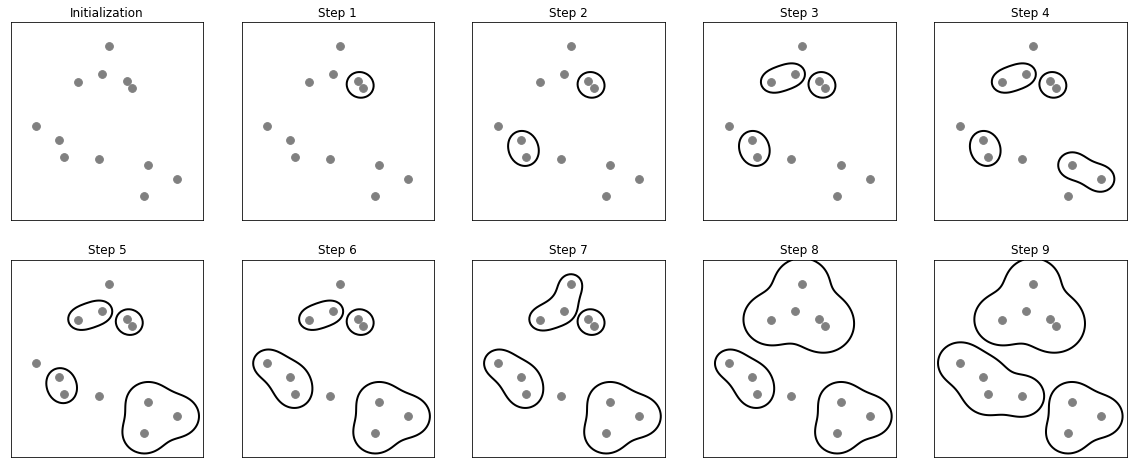

In [20]:
mglearn.plots.plot_agglomerative_algorithm()

- 新しいデータに対する予測ができないので、predictメソッドがない
- 訓練データに対する所属クラスタを作るのに、fit_predictメソッドを用いる

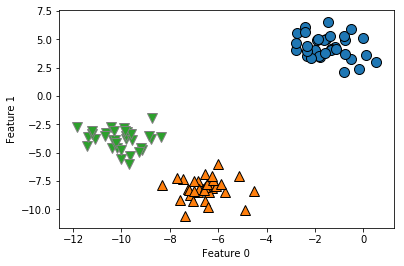

In [22]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### DBSCAN

- density-based spatial clustering of applications with noise（密度に基づくノイズあり空間クラスタリング）
- ユーザがクラスタ数を先験的に与える必要がない
- 利点はどのクラスタにも属さない点を判別できること
- 多くの点が近接しているような「混んでいる」領域に属する点を見つける
- このような領域は、特徴空間の高密度（dense）領域と呼ばれる
- 高密度領域の中にあるデータポイントはコアサンプルと呼ばれる
- パラメータ
    - eps
    - min_samples
- eps以内にmin_samples以上のデータポイントがあれば、コアサンプルになる
- eps以内にあるコアサンプルは同じクラスタに割り当てられる
- アルゴリズム
    - 適当に一つのデータポイントを選ぶ
    - そのデータポイントからeps以内にある全てのデータポイントを見つける
    - その数がmin_samples以下であれば、その点はどこにも属さないノイズ（noise）となる
    - min_sample以上のデータがあれば、コアサンプルとなり、クラスタが割り当てられる
    - eps以内にコアサンプルがなくなるまで、クラスタは成長を続ける
    - これが終わると、まだ選んでいないデータポイントを選んで、同じ手続きを繰り返す

In [24]:
from sklearn.cluster import DBSCAN
X,y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n {}".format(clusters))

Cluster memberships:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


- epsとmin_samplesが小さいトイデータセットに合わなかったため、全て「-1」つまりノイズになった

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


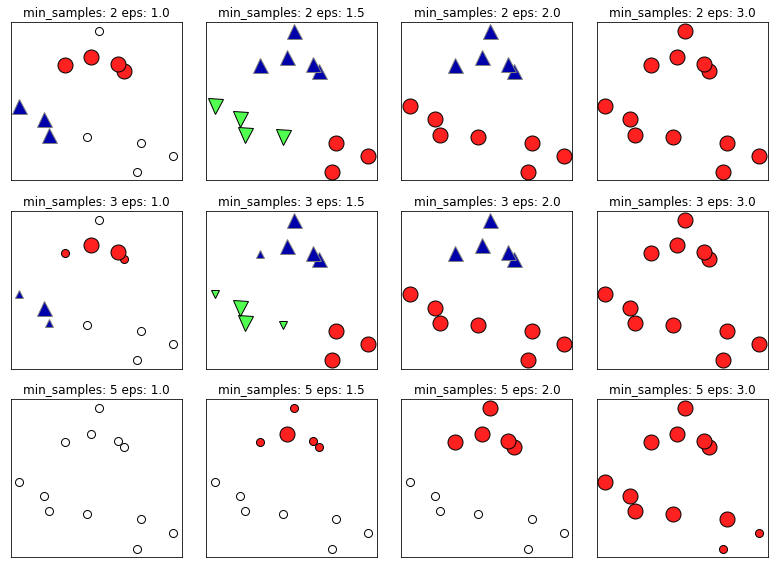

In [25]:
mglearn.plots.plot_dbscan()

- epsの設定で、実質的にクラスタ数を制限することになる
- 良いepsの値を見つけるには, StandardScalerなどでスケール変換をしてからやった方が良い

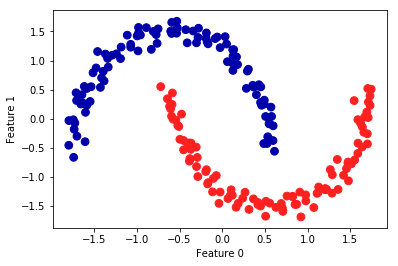

In [28]:
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

#データを平均０、分散１にスケール
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
#クラスタリング結果をプロット
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")